In [68]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn import preprocessing
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 

In [69]:
df = pd.read_csv("D:\\EXCEL R\\ASSIGNMENTS\\logistic regression\\bank-full.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [70]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [72]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [73]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [74]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [75]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [76]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [77]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [78]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [79]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [80]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [81]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [82]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [83]:
df['job']=df['job'].astype('category')  
df['marital']=df['marital'].astype('category') 
df['education']=df['education'].astype('category') 
df['default']=df['default'].astype('category') 
df['housing']=df['housing'].astype('category') 
df['loan']=df['loan'].astype('category') 
df['contact']=df['contact'].astype('category') 
df['month']=df['month'].astype('category') 
df['poutcome']=df['poutcome'].astype('category') 
df['y']=df['y'].astype('category') 


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [85]:
df.shape

(45211, 17)

In [86]:
df = df.dropna()
df.shape

(45211, 17)

In [87]:
df=pd.get_dummies(df,columns=['job'])
df=pd.get_dummies(df,columns=['marital'])
df=pd.get_dummies(df,columns=['education'])
df=pd.get_dummies(df,columns=['default'])
df=pd.get_dummies(df,columns=['housing'])
df=pd.get_dummies(df,columns=['loan'])
df=pd.get_dummies(df,columns=['contact'])
df=pd.get_dummies(df,columns=['month'])
df=pd.get_dummies(df,columns=['poutcome'])
df=pd.get_dummies(df,columns=['y'])


In [90]:
print(df)

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0       58     2143    5       261         1     -1         0           0   
1       44       29    5       151         1     -1         0           0   
2       33        2    5        76         1     -1         0           0   
3       47     1506    5        92         1     -1         0           0   
4       33        1    5       198         1     -1         0           0   
...    ...      ...  ...       ...       ...    ...       ...         ...   
45206   51      825   17       977         3     -1         0           0   
45207   71     1729   17       456         2     -1         0           0   
45208   72     5715   17      1127         5    184         3           0   
45209   57      668   17       508         4     -1         0           0   
45210   37     2971   17       361         2    188        11           0   

       job_blue-collar  job_entrepreneur  ...  month_may  month_nov  \
0   

In [92]:
# Dividing our data into input and output variables 
X = df.iloc[:,:15]
Y = df.iloc[:,16]

In [93]:
df1=pd.DataFrame(X,Y).reset_index()
df1

,job_technician,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services
0,0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0
1,1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0
2,0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0
3,0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0
4,0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0
45207,0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0
45208,0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0
45209,0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0


In [94]:
classifier=LogisticRegression()
classifier.fit(X,Y)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
classifier.coef_

array([[ 6.99360195e-03, -3.10737142e-05,  3.77651830e-02,
         1.98170065e-04, -3.15391044e-03, -5.12123646e-03,
         5.06732848e-01, -3.50658563e+00, -6.37916139e+00,
        -9.38178879e-01, -7.04793380e-01, -6.14119141e+00,
        -7.81057554e-01, -1.04353801e+00, -2.86564109e+00]])

In [96]:
classifier.predict_proba (X)

array([[0.99862046, 0.00137954],
       [0.62186037, 0.37813963],
       [0.82150601, 0.17849399],
       ...,
       [0.51315286, 0.48684714],
       [0.99815068, 0.00184932],
       [0.02869865, 0.97130135]])

In [98]:
#Predict for X dataset
y_pred =classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [100]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,0,0
45208,0,0
45209,0,0


In [101]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
y_prob

,0,1
0,0.998620,0.001380
1,0.621860,0.378140
2,0.821506,0.178494
3,0.999006,0.000994
4,0.637423,0.362577
...,...,...
45206,0.465721,0.534279
45207,0.652951,0.347049
45208,0.513153,0.486847
45209,0.998151,0.001849


In [102]:
new_df = pd.concat([df,y_prob],axis=1)
new_df 

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes,0,1
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0.998620,0.001380
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0.621860,0.378140
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,1,1,0,0.821506,0.178494
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,1,1,0,0.999006,0.000994
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0.637423,0.362577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0.465721,0.534279
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0.652951,0.347049
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,1,0.513153,0.486847
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,0,0,1,1,0,0.998151,0.001849


In [103]:
new_df = pd.concat([df,y_prob],axis=1)
new_df 

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes,0,1
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0.998620,0.001380
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0.621860,0.378140
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,1,1,0,0.821506,0.178494
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,1,1,0,0.999006,0.000994
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0.637423,0.362577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0.465721,0.534279
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0.652951,0.347049
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,1,0.513153,0.486847
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,0,0,1,1,0,0.998151,0.001849


In [104]:
X = new_df.iloc[:,:15]
Y = df.iloc[:,16]

In [105]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[36193  1421]
 [ 4382  3215]]


In [106]:
pd.crosstab(y_pred,Y) 

job_technician,0,1
row_0,,
0,36193,4382
1,1421,3215


# predicted value is 1 and in how many cases actual value is 1 is 3215,and actual value and predicted value is 0 in 36193 cases

In [107]:
accuracy = sum(Y==y_pred)/df.shape[0]
accuracy

0.8716462807723784

In [108]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     37614
           1       0.69      0.42      0.53      7597

    accuracy                           0.87     45211
   macro avg       0.79      0.69      0.73     45211
weighted avg       0.86      0.87      0.86     45211



In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score 

0.6927074395343137

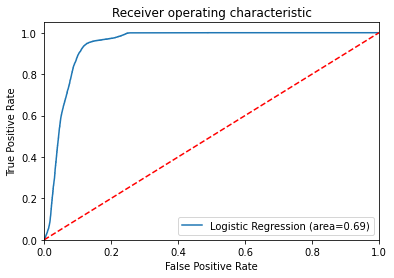

In [110]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [112]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 
y_prob1 

,0
0,0.001380
1,0.378140
2,0.178494
3,0.000994
4,0.362577
...,...
45206,0.534279
45207,0.347049
45208,0.486847
45209,0.001849


In [118]:
import statsmodels.api as sm  
logit = sm.Logit(y_pred,X)  


In [117]:
logit.fit().summary()

D:\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
D:\anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 14


D:\anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45196
Method:                           MLE   Df Model:                           14
Date:                Thu, 18 Mar 2021   Pseudo R-squ.:                     inf
Time:                        07:58:26   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.1049      0.002    -43.427      0.000      -0.110      -0.100
balance              -0.0004    1.8e-05    -21.085      0.000      -0.000      -0.000
day                   0.2544      0.005     49.442      0.000       0.244       0.264
duration              0.0001      0.000      1.112      0.266   -9.67e-05       0.000
campaign             -0.0943      0.009    -10.224      0.000      -0.112      -0.076
pdays                -0.0535      0.002    -30.111      0.000      -0.057      -0.050
previous              4.9990      0.148     33.700      0.000       4.708       5.290
job_admin.          -33.8854      1.155    -29.343      0.000     -36.149     -31.622
job_blue-collar     -64.3587      2.177    -29.559      0.000     -68.626     -60.091
job_entrepreneur     -8.2573      0.466    -17.737      0.000      -9.170      -7.345
job_housemaid        -6.7432      0.401    -16.836      0.000      -7.528      -5.958
job_management      -61.0008      2.098    -29.080      0.000     -65.112     -56.889
job_retired          -4.1341      0.227    -18.221      0.000      -4.579      -3.689
job_self-employed   -10.5168      0.530    -19.848      0.000     -11.555      -9.478
job_services        -28.5900      1.093    -26.155      0.000     -30.732     -26.448
=====================================================================================

Possibly complete quasi-separation: A fraction 0.71 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""